In [1]:
from astropy.io import ascii 

In [2]:
#data = ascii.read('pulsars_gaia_xmatch.csv')
data = ascii.read('ipta_pulsars_gaia_xmatch.csv')

In [3]:
data.keys()

['angDist',
 'col1',
 'col2',
 'col3',
 'ra_ep2000',
 'dec_ep2000',
 'errHalfMaj',
 'errHalfMin',
 'errPosAng',
 'ra',
 'dec',
 'source_id',
 'ref_epoch',
 'ra_error',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'duplicated_source',
 'phot_g_n_obs',
 'phot_g_mean_flux',
 'phot_g_mean_flux_error',
 'phot_g_mean_mag',
 'phot_variable_flag',
 'l',
 'b']

In [5]:
data['phot_g_mean_mag']

20.255
18.209
19.557
19.042
20.31
16.264
20.56
17.995
19.323
16.19
14.464


In [6]:
from pygaia.errors.astrometric import parallaxErrorSkyAvg

In [7]:
sigmaPar=parallaxErrorSkyAvg(data['phot_g_mean_mag'], -0.5)

In [8]:
sigmaPar

764.413239046
155.291154722
426.738127815
284.110263824
801.324056738
49.0961397765
994.683909138
134.535895164
353.720383404
47.2409024277
20.2084526652


In [22]:
data['col1']

J0437-4715
J0613-0200
J1012+5307
J1024-0719
J1603-7202
J1730-2304
J1744-1134
J1751-2857
J1801-1417
J1804-2717
J1824-2452A


In [9]:
1/5./(sigmaPar*1e-3)

0.261638587329
1.28790336035
0.468671503584
0.703952040691
0.249586915953
4.07364002364
0.201068900545
1.48659210804
0.565418362593
4.23361937901
9.8968487748


In [10]:
data['angDist']

0.556052
4.436126
0.360541
0.857824
4.894165
3.64931
1.858766
3.00057
4.497614
2.720735
2.936042


In [11]:
def gaussian(mean, sigma, array, amplitude=1.0):
    return amplitude/np.sqrt(2.*np.pi*sigma**2.)*np.exp(-(array - mean)**2./(2.*sigma**2.))

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [13]:
x = np.linspace(0.01, 10, 10000)

In [14]:
distance = 100. #pc
parallax = 1/distance
plt.plot(x, gaussian(parallax, ))

TypeError: gaussian() takes at least 3 arguments (1 given)

In [15]:
distdata = ascii.read('ipta_pulsarDist_4Gaia.txt')

In [16]:
distdata.keys()

['name', 'distance', 'plus', 'minus']

In [23]:
distdata

name,distance,plus,minus
str16,float64,float64,float64
J0437-4715,0.156,0.001,0.001
J0613-0200,0.9,0.4,0.2
J1012+5307,0.7,0.2,0.1
J1024-0719,0.49,0.12,0.08
J1603-8722-7202,1.2,0.2,0.2
J1730-8722-2304,0.5,0.1,0.1
J1744-8722-1134,0.42,0.02,0.02
J1751-8722-2857,1.1,0.2,0.2
J1801-8722-1417,1.5,0.3,0.3


In [18]:
distGaiaErr = sigmaPar*1e-3*distdata['distance']**2.

In [19]:
distdata['plus']

0.001
0.4
0.2
0.12
0.2
0.1
0.02
0.2
0.3
0.2
1.0


(0.1, 10)

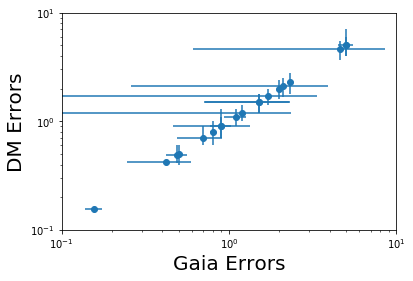

In [20]:
plt.errorbar(distdata['distance'], distdata['distance'], fmt='o', xerr=sigmaPar*1e-3*distdata['distance']**2., yerr=[distdata['minus'], distdata['plus']])
plt.xlabel('Gaia Errors', fontsize=20)
plt.ylabel('DM Errors', fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.1, 10)
plt.ylim(0.1, 10)

Text(0,0.5,'DM Uncertainty')

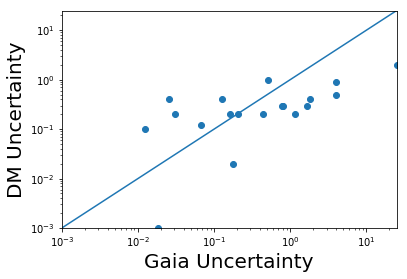

In [96]:
plt.scatter(distGaiaErr, distdata['plus'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001, 25)
plt.ylim(0.001, 25)
plt.plot([0.001, 25], [0.001, 25])
plt.xlabel('Gaia Uncertainty', fontsize=20)
plt.ylabel('DM Uncertainty', fontsize=20)

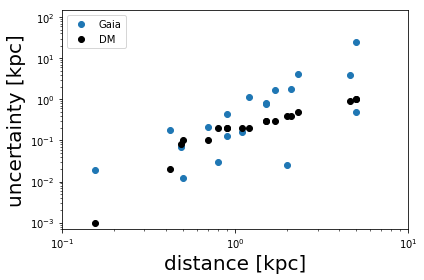

In [25]:
plt.scatter(distdata['distance'], distGaiaErr, label='Gaia Parallax Error (projected)')
#plt.scatter(distdata['distance'], distdata['plus'], color='grey', label='DM minus')
plt.scatter(distdata['distance'], distdata['minus'], color='black', label='DM erros')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 10)
plt.ylim(0.0007, 150)
plt.xlabel('distance [kpc]', fontsize=20)
plt.ylabel('uncertainty [kpc]', fontsize=20)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('futureGaiaUncertainties.pdf')

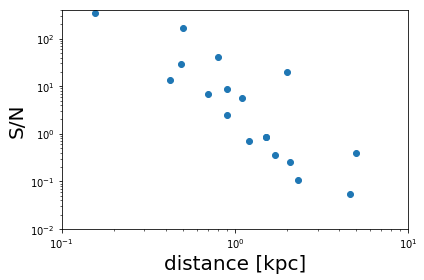

In [122]:
plt.scatter(distdata['distance'], 1./distdata['distance']/distGaiaErr)
plt.yscale('log')
plt.ylim(0.01, 400)
plt.xscale('log')
plt.xlim(0.1, 10)
plt.xlabel('distance [kpc]', fontsize=20)
plt.ylabel('S/N', fontsize=20)
plt.tight_layout()
plt.savefig('gaiaSN.pdf')